# DEMO: Predicting day-ahead energy consumption

In [10]:
# WARNING: This demo is in Python 3, despite the OMF being based in Python 2.
from datetime import datetime as dt, timedelta
import pandas as pd
import loadForecast as lf
import mpld3
mpld3.enable_notebook()
%matplotlib inline

In [11]:
f = 'data/NCENT.csv'
df = pd.read_csv(f)
all_X = lf.makeUsefulDf(df)
all_y = df['load']
predictions, accuracy = lf.neural_net_predictions(all_X, all_y)

Percent accuracy (MAPE). Train: 95.7745136131201.  Test: 95.23956096474399


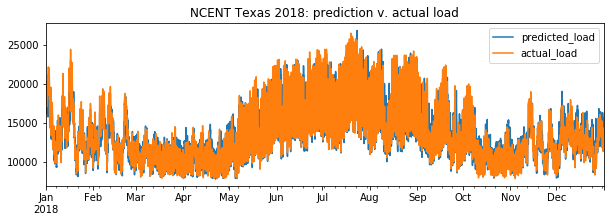

In [12]:
print('Percent accuracy (MAPE). Train: {}.  Test: {}'.format(100-accuracy['train'], 100-accuracy['test']))

df_r = pd.DataFrame()
df_r['predicted_load'] = predictions
df_r['actual_load'] = [float(f) for f in all_y[-8760:]]
df_r.index = [dt(2018, 1, 1, 0) + timedelta(hours=1)*i for i in range(8760)]
df_r.plot(figsize=(10, 3), title="NCENT Texas 2018: prediction v. actual load")